In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.drop(["Id","Species"], axis=1, inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.shape

(150, 4)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

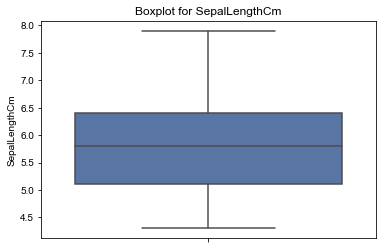

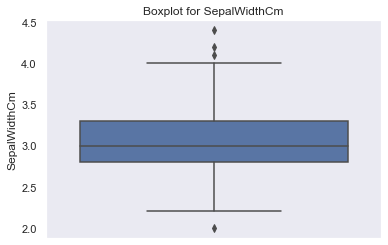

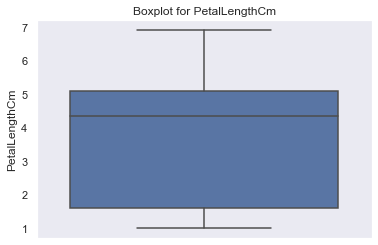

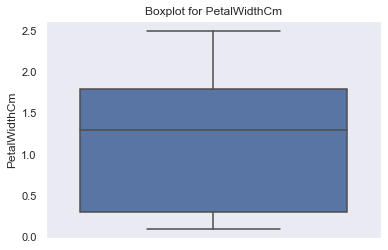

In [8]:
for item in iris_df.columns:
    plt.title("Boxplot for {}".format(item))
    sns.set_theme(style="dark")    
    sns.boxplot(y=iris_df[item], data = iris_df)
    plt.show()

We have outliers in sepal width cm

In [9]:
q1 = iris_df["SepalWidthCm"].quantile(0.25)
q3 = iris_df["SepalWidthCm"].quantile(0.75)
iqr = q3-q1

#After removing outliers we've this many records
iris_df = iris_df[((iris_df["SepalWidthCm"] >= q1-1.5*iqr) & (iris_df["SepalWidthCm"] <= q3+1.5*iqr))]
iris_df.shape

(146, 4)

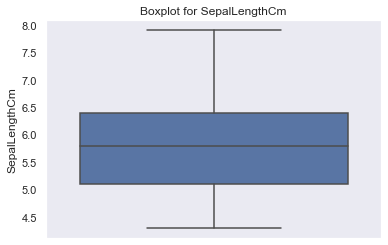

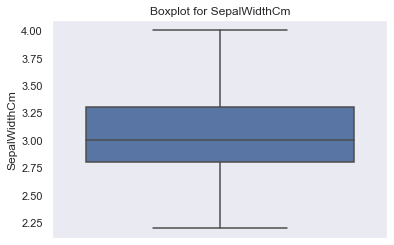

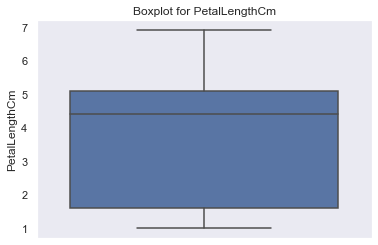

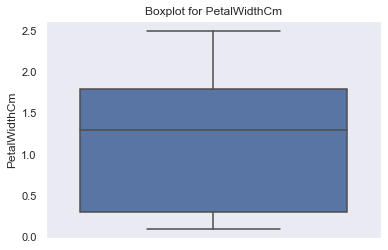

In [10]:
for item in iris_df.columns:
    plt.title("Boxplot for {}".format(item))
    sns.set_theme(style="dark")    
    sns.boxplot(y=iris_df[item], data = iris_df)
    plt.show()

In [11]:
#standordizing to avoid bias
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(iris_df)
standard_df[:5]

array([[-0.9105154 ,  1.1757891 , -1.3748782 , -1.34589856],
       [-1.15112218, -0.09392398, -1.3748782 , -1.34589856],
       [-1.39172896,  0.41396125, -1.43198551, -1.34589856],
       [-1.51203236,  0.16001863, -1.31777088, -1.34589856],
       [-1.03081879,  1.42973171, -1.3748782 , -1.34589856]])

In [14]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3

In [15]:
#Finding the optinum number of clusters
from sklearn.cluster import KMeans
cluster_errors = []
for num_cluster in range(1,15):
    clusters = KMeans(num_cluster, n_init=10, init='k-means++')
    clusters.fit(x)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"Cluster_Range": range(1,15), "Errors":cluster_errors})
clusters_df.head()

,Cluster_Range,Errors
0,1,655.032534
1,2,143.860075
2,3,73.516565
3,4,53.304878
4,5,42.548635


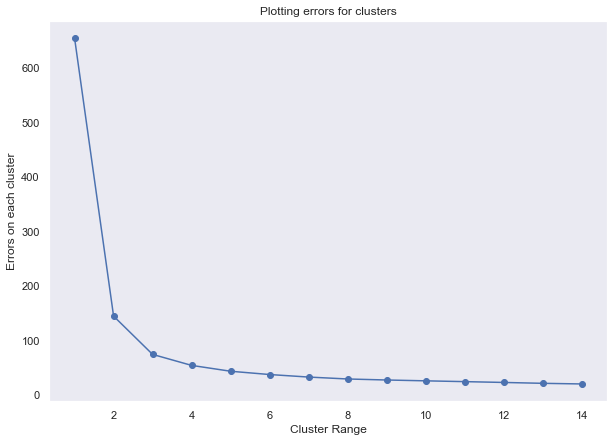

In [16]:
plt.figure(figsize=(10,7))
plt.plot(clusters_df.Cluster_Range, clusters_df.Errors, marker='o')
plt.title("Plotting errors for clusters")
plt.xlabel("Cluster Range")
plt.ylabel("Errors on each cluster")
plt.show()

In [17]:
# Creating object of the model and fitting it
model = KMeans(n_clusters = 3, max_iter = 300, init='k-means++', random_state=0)
y_means = model.fit_predict(x)

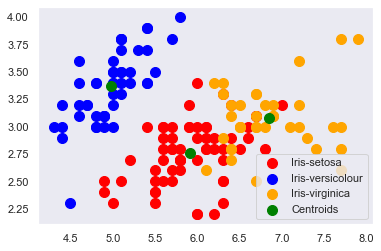

In [21]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1],c="red", label = 'Iris-setosa', s=100)
plt.scatter(x[y_means == 1,0], x[y_means == 1,1],c="blue", label = 'Iris-versicolour', s=100)
plt.scatter(x[y_means == 2,0], x[y_means == 2,1],c="orange", label = 'Iris-virginica', s=100)

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids')

plt.legend()